In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

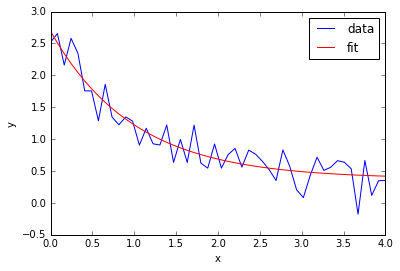

In [12]:
x_data = np.linspace(0, 4, 50)
y_truedata = func(x_data, 2.5, 1.3, 0.5)

y_noise = 0.2 * np.random.normal(size=x_data.size)
y_noisedata = y_truedata + y_noise

popt, pcov = curve_fit(func, x_data, y_noisedata)

plt.plot(x_data, y_noisedata, 'b-', label='data')
plt.plot(x_data, func(x_data,*popt), 'r-', label='fit')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [13]:
print(x_data)

[ 0.          0.08163265  0.16326531  0.24489796  0.32653061  0.40816327
  0.48979592  0.57142857  0.65306122  0.73469388  0.81632653  0.89795918
  0.97959184  1.06122449  1.14285714  1.2244898   1.30612245  1.3877551
  1.46938776  1.55102041  1.63265306  1.71428571  1.79591837  1.87755102
  1.95918367  2.04081633  2.12244898  2.20408163  2.28571429  2.36734694
  2.44897959  2.53061224  2.6122449   2.69387755  2.7755102   2.85714286
  2.93877551  3.02040816  3.10204082  3.18367347  3.26530612  3.34693878
  3.42857143  3.51020408  3.59183673  3.67346939  3.75510204  3.83673469
  3.91836735  4.        ]


In [14]:
print(y_truedata)

[ 3.          2.7482863   2.52191652  2.31833889  2.13525857  1.97061177
  1.82254252  1.6893817   1.56962823  1.4619322   1.3650796   1.27797864
  1.19964749  1.12920315  1.06585153  1.0088785   0.95764182  0.91156393
  0.87012542  0.83285917  0.79934508  0.76920538  0.74210031  0.71772432
  0.69580264  0.67608816  0.65835864  0.64241422  0.62807518  0.61517987
  0.60358293  0.59315363  0.58377441  0.57533955  0.56775395  0.56093211
  0.55479713  0.54927986  0.54431809  0.5398559   0.53584299  0.53223412
  0.52898861  0.52606988  0.52344502  0.52108445  0.51896155  0.5170524
  0.51533547  0.51379141]


In [15]:
print(y_noise)

[-0.4786983  -0.09275709 -0.36000231  0.26201279  0.2123512  -0.21375448
 -0.06615917 -0.40147665  0.28992461 -0.11609581 -0.14013599  0.07049847
  0.08347837 -0.22380401  0.10486384 -0.08187955 -0.04962337  0.31001498
 -0.23408098  0.1639746  -0.16525688  0.45016574 -0.11835022 -0.17251702
  0.22789688 -0.13024616  0.1003307   0.21290258 -0.06678104  0.21290955
  0.16140889  0.05935876 -0.06328469 -0.22398528  0.26339009  0.01408268
 -0.34754054 -0.46611497 -0.11227395  0.17690743 -0.02626423  0.02675817
  0.13383208  0.11164476  0.01240385 -0.69785972  0.14645756 -0.39929943
 -0.16786119 -0.16125785]


In [16]:
print(y_noisedata)

[ 2.5213017   2.65552921  2.16191421  2.58035168  2.34760977  1.75685729
  1.75638335  1.28790505  1.85955284  1.34583639  1.22494361  1.34847712
  1.28312586  0.90539914  1.17071537  0.92699894  0.90801845  1.22157891
  0.63604444  0.99683377  0.63408821  1.21937112  0.62375009  0.5452073
  0.92369952  0.545842    0.75868935  0.8553168   0.56129414  0.82808942
  0.76499182  0.65251239  0.52048972  0.35135427  0.83114404  0.57501479
  0.20725659  0.08316488  0.43204414  0.71676333  0.50957876  0.55899229
  0.66282069  0.63771465  0.53584888 -0.17677527  0.66541911  0.11775297
  0.34747428  0.35253356]
